<a href="https://colab.research.google.com/github/LauraDimaria/Project_2/blob/main/White_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###White Wine Quality- Part 3

Laura Dimaria

6/22/22

In [1]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
filename = '/content/winequality-white.csv'
df = pd.read_csv(filename, sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


There are no unnecessary columns to drop.

In [5]:
#Find and drop duplicates
df.duplicated().sum()

937

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
#No missing values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
#All data is numeric
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
#We are definitely going to have some outliers based on this.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


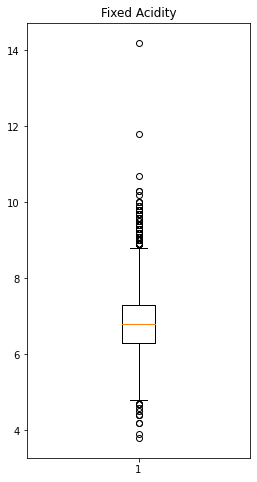

In [10]:
#Min/Max and Q1/Q3 all look fairly even, we have a few lower outliers and a good amount of higher ones.
plt.figure(figsize=(4,8))
plt.title('Fixed Acidity')
plt.boxplot(df['fixed acidity']);

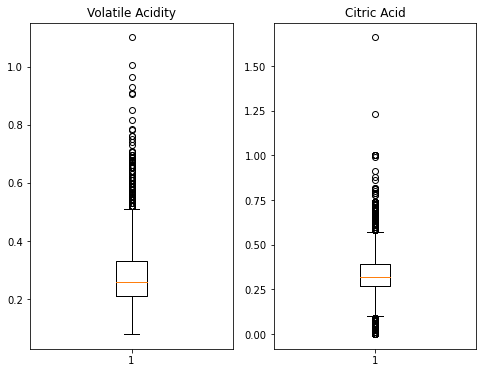

In [11]:
#Again, we have a good amount of outliers in these two columns.
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(8,6));
# Subplot 1 
axes[0].boxplot(df['volatile acidity']);
axes[0].set_title('Volatile Acidity', fontsize = 12);
# Subplot 2
axes[1].boxplot(df['citric acid']);
axes[1].set_title('Citric Acid', fontsize = 12);

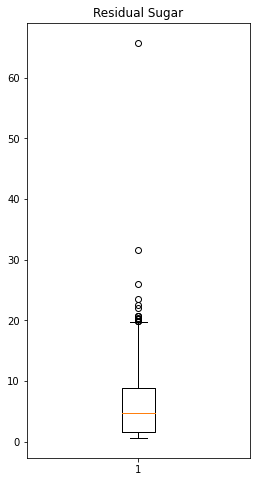

In [12]:
#Not as many outliers but we do have one that is incredibly high in this category.
#I would expect anything above the median to have scored a 6 or lower in quality.
plt.figure(figsize=(4,8))
plt.title('Residual Sugar')
plt.boxplot(df['residual sugar']);

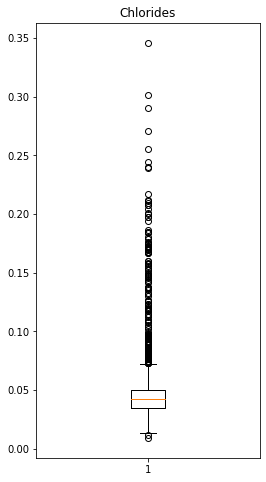

In [13]:
#Very small box plot with A LOT of outliers.
plt.figure(figsize=(4,8))
plt.title('Chlorides')
plt.boxplot(df['chlorides']);

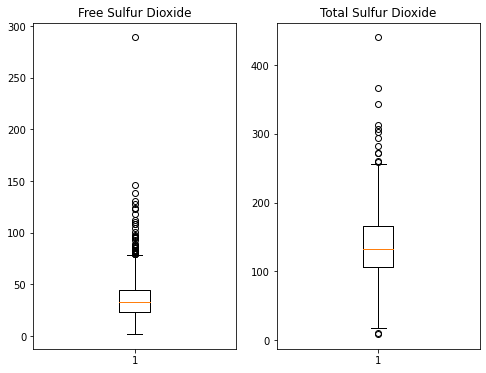

In [14]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(8,6));

axes[0].boxplot(df['free sulfur dioxide']);
axes[0].set_title('Free Sulfur Dioxide', fontsize = 12);

axes[1].boxplot(df['total sulfur dioxide']);
axes[1].set_title('Total Sulfur Dioxide', fontsize = 12);

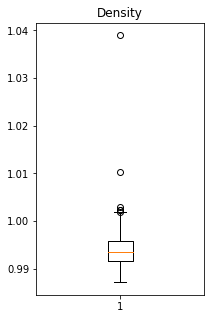

In [15]:
#A few outliers, and again the one lone outlier that is very high
plt.figure(figsize=(3,5))
plt.title('Density')
plt.boxplot(df['density']);

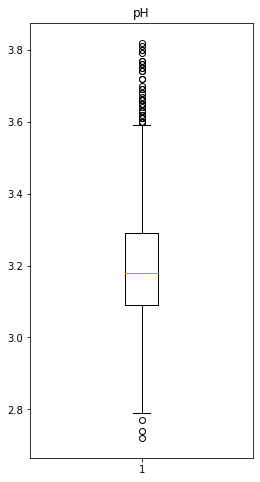

In [16]:
#A good amount of outliers again, although these are fairly condensed
plt.figure(figsize=(4,8))
plt.title('pH')
plt.boxplot(df['pH']);

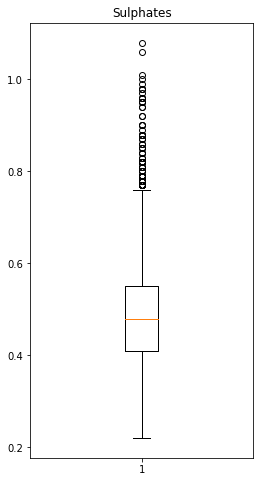

In [17]:
#The Q1 and Q3 range look very close, along with the min/max.
#We have a good amount of outliers
plt.figure(figsize=(4,8))
plt.title('Sulphates')
plt.boxplot(df['sulphates']);

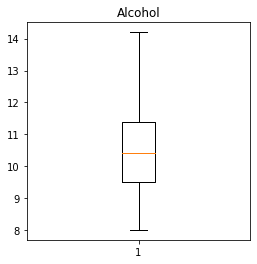

In [18]:
#Range of alcohol percentage, the median is right where I expected it to be.
#I would expect the higher percentage scores to be in the lower quality range.
plt.figure(figsize=(4,4))
plt.title('Alcohol')
plt.boxplot(df['alcohol']);

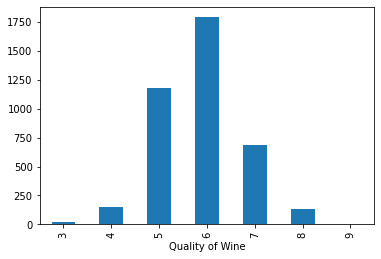

In [19]:
#We have a lot of mediocre wine quality(5/6), some 'good' wine(7/8), a sampling of bad(3/4) and barely any excellent wine.
#I guess I've been drinking mediocre vinho verde...
df['quality'].value_counts().sort_index().plot.bar();
plt.xlabel('Quality of Wine');

There are quite a few columns with outliers that I would like to explore, especially to see if they're related to the lower scoring wines.

##White Wine Quality - Exploratory Analysis

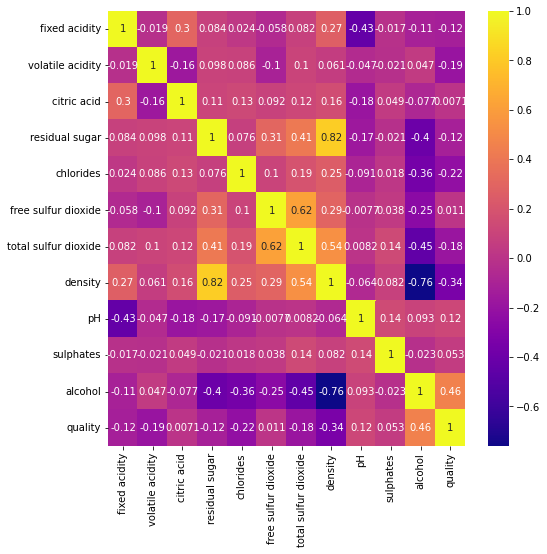

In [23]:
corr = df.corr()
plt.figure(figsize = (8, 8))
sns.heatmap(corr, cmap='plasma', annot=True);

Here we can see the correlation between features, as well as the target. There are only a few features with a positive correlation to our target, quality. Alcohol has the strongest with a 0.46 correlation, with pH being the second highest with 0.12. As someone who has a fair knowledge of the complexities of wine, I expected more correlation between quality and fixed acidity, as fixed acidity helps a wine to not fall flat on the palette.

Other than our target correlation, we have a very strong relationship between density and residual sugar, which I expected. There is also a strong positive correlation between free and total sulfur dioxide.

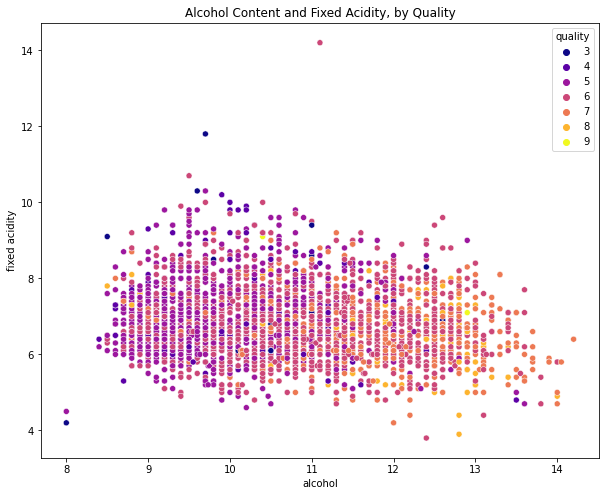

In [80]:
plt.figure(figsize=(10,8))
plt.title('Alcohol Content and Fixed Acidity, by Quality')
sns.scatterplot(data=df, x='alcohol', y='fixed acidity', hue='quality', palette='plasma');

Here we can see the relationship between alcohol content and fixed acidity. The wines with a higher quality rating tend to have a higher alcohol content and lower fixed acidity. Wines with a lower quality tend to be lower in alcohol content and also higher in fixed acidity.

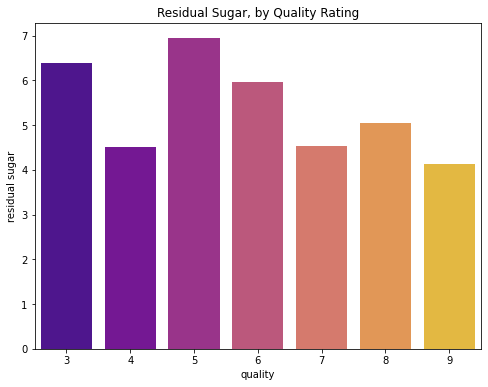

In [57]:
plt.figure(figsize=(8, 6))
plt.title('Residual Sugar, by Quality Rating')
sns.barplot(x='quality', y='residual sugar', data=df, ci=None, palette='plasma');

Here we can see that wines with a lower quality rating tend to have a higher count of residual sugar. Vinho Verde wines have many forms and is known for its characteristic higher sugar content and lower alcohol content. Recently, thanks to a wine renaissance, the grape has been making a comeback as a premium grape with less sugar content and higher alcohol.

I wanted to visualize the relationship between density and residual sugar, but a few outliers made the visualization cramped and difficult to read, so I created a filtered dataframe to only include rows with a residal sugar less than 30.

In [73]:
sugar_df = df[df['residual sugar'] < 30]

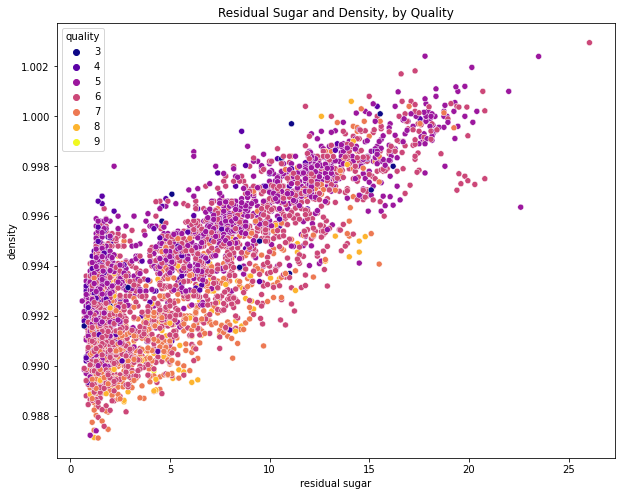

In [78]:
plt.figure(figsize=(10,8))
plt.title('Residual Sugar and Density, by Quality')
sns.scatterplot(data=sugar_df, x='residual sugar', y='density', hue='quality', palette='plasma');

As explained above, thanks to a renewal of interest in wine over the recent years, vinho verde has seen a spike in higher quality wines. We can see here the correlation between density and residual sugar, where higher quality wines tend to be lower in sugars as well as density. Wine density is affected by both sugar content and alcohol.